In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [4]:
X_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_test

array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
        

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_test.shape

(10000, 1)

In [10]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [11]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [5]:
y_train = y_train.reshape(-1,)

In [13]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [6]:
y_test = y_test.reshape(-1,)

In [15]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [7]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [8]:
def visualizer(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

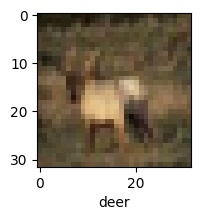

In [18]:
visualizer(X_train, y_train,3)

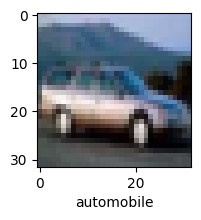

In [19]:
visualizer(X_train, y_train, 4)

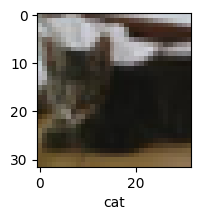

In [20]:
visualizer(X_train, y_train, 9)

In [9]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [22]:
X_train[0]

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [23]:
X_test[0]

array([[[0.61960784, 0.43921569, 0.19215686],
        [0.62352941, 0.43529412, 0.18431373],
        [0.64705882, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254902, 0.14117647],
        [0.49411765, 0.35686275, 0.14117647],
        [0.45490196, 0.33333333, 0.12941176]],

       [[0.59607843, 0.43921569, 0.2       ],
        [0.59215686, 0.43137255, 0.15686275],
        [0.62352941, 0.44705882, 0.17647059],
        ...,
        [0.53333333, 0.37254902, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509804, 0.13333333]],

       [[0.59215686, 0.43137255, 0.18431373],
        [0.59215686, 0.42745098, 0.12941176],
        [0.61960784, 0.43529412, 0.14117647],
        ...,
        [0.54509804, 0.38431373, 0.13333333],
        [0.50980392, 0.37254902, 0.13333333],
        [0.47058824, 0.34901961, 0.12941176]],

       ...,

       [[0.26666667, 0.48627451, 0.69411765],
        [0.16470588, 0.39215686, 0.58039216],
        [0.12156863, 0

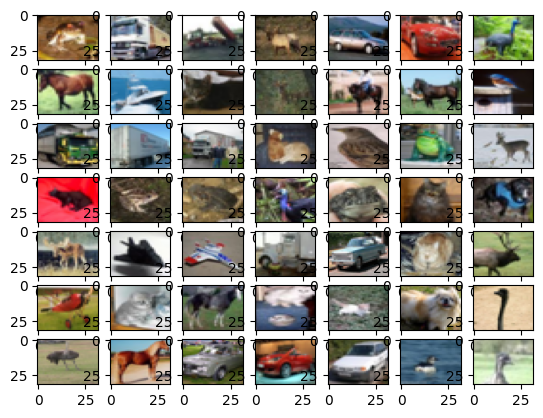

In [10]:
fig, ax = plt.subplots(7, 7)
v = 0

for i in range(7):
    for j in range(7):
        ax[i][j].imshow( X_train[v], aspect='auto')
        v += 1

plt.show()

#Artificial Neural Network

In [27]:
ANN_model = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

ANN_model.summary()

ANN_model.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = ANN_model.fit(X_train, y_train, validation_data = (X_test , y_test), epochs=5)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 3000)              9219000   
                                                                 
 dense_1 (Dense)             (None, 1000)              3001000   
                                                                 
 dense_2 (Dense)             (None, 10)                10010     
                                                                 
Total params: 12230010 (46.65 MB)
Trainable params: 12230010 (46.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5
1563/1563 [==============================] - 153s 98ms/step - loss: 1.8133 - accuracy: 0.3555 - val_loss: 1.7611 - val_accuracy: 0.3565


In [28]:
ANN_model.evaluate(X_test, y_test)

313/313 [==============================] - 8s 27ms/step - loss: 1.8060 - accuracy: 0.3805


[1.8059624433517456, 0.3804999887943268]

In [29]:
ANN_model.evaluate(X_train, y_train)

1563/1563 [==============================] - 48s 31ms/step - loss: 1.7435 - accuracy: 0.3965


[1.7434643507003784, 0.39645999670028687]

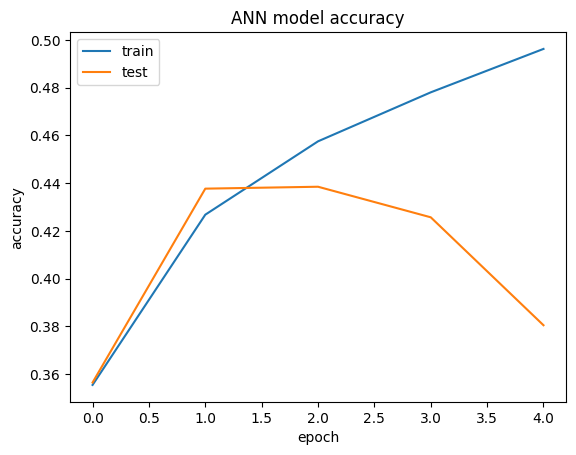

In [30]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('ANN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

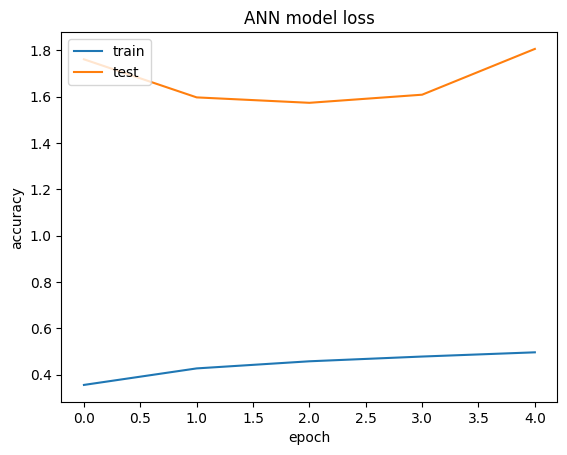

In [31]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_loss'])
plt.title('ANN model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [32]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ANN_model.predict(X_test)
y_classes = [np.argmax(element) for element in y_pred]
print("Classification Report: \n", classification_report(y_test, y_classes))

313/313 [==============================] - 9s 29ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.29      0.75      0.42      1000
           1       0.27      0.90      0.42      1000
           2       0.41      0.18      0.25      1000
           3       0.42      0.22      0.28      1000
           4       0.48      0.31      0.38      1000
           5       0.51      0.26      0.34      1000
           6       0.54      0.46      0.50      1000
           7       0.63      0.41      0.50      1000
           8       0.80      0.11      0.19      1000
           9       0.55      0.21      0.30      1000

    accuracy                           0.38     10000
   macro avg       0.49      0.38      0.36     10000
weighted avg       0.49      0.38      0.36     10000



#CNN

In [33]:
CNN_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

CNN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2304)              0         
                                                                 
 dense_3 (Dense)             (None, 64)               

In [35]:
CNN_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history1 = CNN_model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs=10)

Epoch 1/10
1563/1563 [==============================] - 89s 56ms/step - loss: 1.1652 - accuracy: 0.5900 - val_loss: 1.0964 - val_accuracy: 0.6216
Epoch 2/10
1563/1563 [==============================] - 63s 41ms/step - loss: 1.0320 - accuracy: 0.6410 - val_loss: 1.0376 - val_accuracy: 0.6327
Epoch 3/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.9448 - accuracy: 0.6728 - val_loss: 0.9597 - val_accuracy: 0.6654
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8801 - accuracy: 0.6951 - val_loss: 0.9882 - val_accuracy: 0.6574
Epoch 5/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.8293 - accuracy: 0.7121 - val_loss: 0.9313 - val_accuracy: 0.6846
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7879 - accuracy: 0.7275 - val_loss: 0.9149 - val_accuracy: 0.6933
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7447 - accuracy: 0.7419 - val_loss: 0.9220 -

In [36]:
CNN_model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9635 - accuracy: 0.6918


[0.96354079246521, 0.6917999982833862]

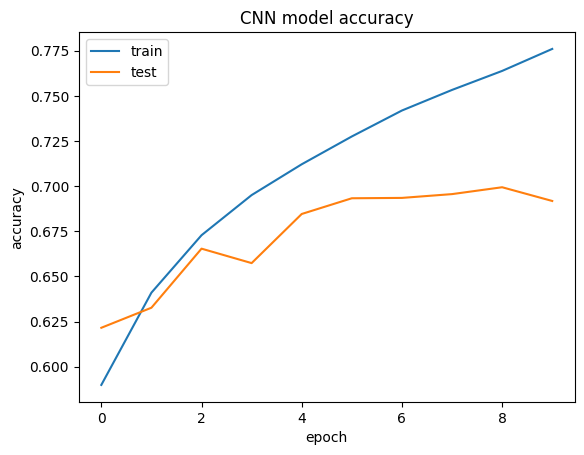

In [45]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [37]:
y_pred = CNN_model.predict(X_test)
y_pred[:5]

313/313 [==============================] - 3s 10ms/step


array([[4.70555067e-04, 1.05306450e-02, 1.32590276e-03, 9.05279994e-01,
        1.89790197e-04, 6.55896142e-02, 5.58402203e-03, 2.65786424e-04,
        1.06380703e-02, 1.25642764e-04],
       [3.73189287e-05, 3.60418606e-04, 1.62871210e-08, 1.72120167e-08,
        1.04798843e-10, 9.65777718e-12, 8.52026838e-10, 1.16812690e-12,
        9.99600232e-01, 2.07260837e-06],
       [2.14050829e-01, 2.59032339e-01, 3.28250491e-04, 7.85823260e-03,
        3.91615229e-03, 4.28088941e-04, 1.04480925e-04, 2.03008726e-02,
        1.27091512e-01, 3.66889209e-01],
       [8.80675256e-01, 3.41215730e-02, 1.03235589e-02, 2.84236623e-03,
        3.12940124e-03, 5.67403004e-05, 4.04567341e-04, 2.97781429e-04,
        6.79635108e-02, 1.85153258e-04],
       [2.33295100e-06, 1.14543509e-04, 5.30577311e-03, 2.59065796e-02,
        1.66368589e-01, 2.12370837e-03, 8.00168216e-01, 4.45964361e-06,
        5.40504334e-06, 3.02224436e-07]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

1/1 [==============================] - 0s 39ms/step
Original label is automobile and predicted label is automobile


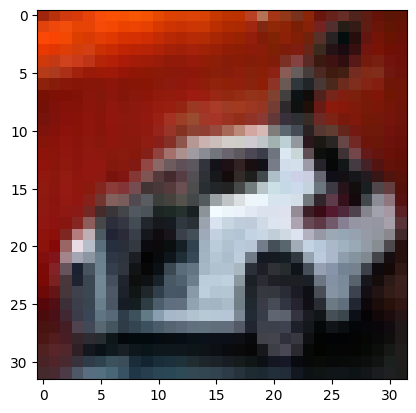

In [44]:
labels = '''airplane automobile bird cat deerdog frog horseship truck'''.split()

# select the image from our test dataset
image_number = 6

# display the image
plt.imshow(X_test[image_number])

# load the image in an array
n = np.array(X_test[image_number])

# reshape it
p = n.reshape(1, 32, 32, 3)

# pass in the network for prediction and
# save the predicted label
predicted_label = labels[CNN_model.predict(p).argmax()]

# load the original label
original_label = labels[y_test[image_number]]

# display the result
print("Original label is {} and predicted label is {}".format(
    original_label, predicted_label))